In [6]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import naive_bayes

In [16]:
bank_data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv")
bank_data

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [17]:
bank_data['income'] = (bank_data['income'] - bank_data['income'].mean()) / bank_data['income'].std()
bank_data

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,-0.773523,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,0.198541,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,-0.848766,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,-0.554180,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,1.787071,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,1.511765,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,-1.383916,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,-0.895210,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,-0.993237,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [18]:
bank_data['age'] = (bank_data['age'] - bank_data['age'].mean()) / bank_data['age'].std()
bank_data

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.388563,-0.773523,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,-0.166032,0.198541,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.596536,-0.848766,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,-1.344546,-0.554180,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,1.012482,1.787071,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,1.289779,1.511765,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,-0.859275,-1.383916,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,-0.789951,-0.895210,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,-0.928600,-0.993237,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [19]:
bank_new = bank_data.drop('id', axis=1)
bank_new

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,0.388563,-0.773523,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,-0.166032,0.198541,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,0.596536,-0.848766,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,-1.344546,-0.554180,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,1.012482,1.787071,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,1.289779,1.511765,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,-0.859275,-1.383916,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,-0.789951,-0.895210,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,-0.928600,-0.993237,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [20]:
bank_seperate = bank_new[["age", "income", "children", "gender", "region", "married", "car", "savings_acct", "current_acct", "mortgage"]]
bank_seperate

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,0.388563,-0.773523,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,-0.166032,0.198541,3,MALE,TOWN,YES,YES,NO,YES,YES
2,0.596536,-0.848766,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,-1.344546,-0.554180,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,1.012482,1.787071,0,FEMALE,RURAL,YES,NO,YES,NO,NO
...,...,...,...,...,...,...,...,...,...,...
595,1.289779,1.511765,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES
596,-0.859275,-1.383916,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
597,-0.789951,-0.895210,0,FEMALE,TOWN,YES,YES,YES,NO,NO
598,-0.928600,-0.993237,0,MALE,INNER_CITY,YES,NO,YES,NO,YES


In [21]:
bank_target = bank_new["pep"]
bank_target

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
595     NO
596     NO
597    YES
598     NO
599    YES
Name: pep, Length: 600, dtype: object

In [23]:
bank_d = pd.get_dummies(bank_seperate)
bank_d

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,0.388563,-0.773523,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,-0.166032,0.198541,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,0.596536,-0.848766,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,-1.344546,-0.554180,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,1.012482,1.787071,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.289779,1.511765,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
596,-0.859275,-1.383916,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
597,-0.789951,-0.895210,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
598,-0.928600,-0.993237,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1


In [24]:
train, test, target_train, target_test = train_test_split(bank_d, bank_target, test_size = 0.2, random_state=12)
train[0:10]

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
281,-1.691167,-0.923591,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
571,-0.166032,0.669963,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0
543,1.428428,1.647081,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1
421,0.457887,1.078647,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0
85,-0.443329,0.322422,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0
11,0.665860,-0.067075,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
83,-0.512654,-0.862798,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
314,0.804509,-0.735482,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
597,-0.789951,-0.895210,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
266,1.081806,0.442264,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0


In [25]:
test[0:10]

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
326,-0.235356,0.568106,1,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1
360,1.497752,1.868044,2,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0
348,1.428428,0.806767,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1
567,-1.621843,-0.787081,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
244,0.527212,0.023371,2,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
294,-0.027383,-0.389809,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1
193,-0.096707,-0.874007,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1
589,-0.928600,-1.155135,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0
405,0.319239,0.703515,3,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0
383,-0.166032,0.566905,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0


In [41]:
n_neighbors = 7

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [42]:
knnpreds_test = knnclf.predict(test)

In [43]:
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.81      0.72      0.76        65
         YES       0.71      0.80      0.75        55

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120



for k=5 accuracy = 0.72
    k= 7 accuracy = 0.76
    k=9 accuracy = 0.74

In [44]:
knncm = confusion_matrix(target_test, knnpreds_test)
print(knncm)

[[47 18]
 [11 44]]


In [45]:
print(knnclf.score(test, target_test))

0.7583333333333333


In [46]:
print(knnclf.score(train, target_train))

1.0


Decision tree

In [47]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [48]:
treeclf = treeclf.fit(train, target_train)

In [49]:
treepreds_test = treeclf.predict(test)
print(treepreds_test)

['YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES']


In [51]:
print(treeclf.score(test, target_test))

0.85


In [53]:
print(treeclf.score(train, target_train))

0.99375


In [54]:
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.87      0.85      0.86        65
         YES       0.82      0.85      0.84        55

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



In [56]:
treecm = confusion_matrix(target_test, treepreds_test)
print(treecm)

[[55 10]
 [ 8 47]]


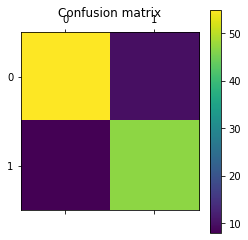

In [57]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

Gaussian naive Bayes classifier

In [58]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, target_train)
nbpreds_test = nbclf.predict(test)
print(nbpreds_test)

['NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO']


In [59]:
print(nbclf.score(train, target_train))

0.6354166666666666


In [61]:
print(nbclf.score(test, target_test))

0.6583333333333333


linear discriminant analysis

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)
print(ldpreds_test)

['NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO']


C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [65]:
print(ldclf.score(train, target_train))

0.6270833333333333


In [66]:
print(ldclf.score(test, target_test))

0.6833333333333333


In [72]:
from sklearn.model_selection import cross_val_score
cv_scores_tree = cross_val_score(treeclf, bank_d, bank_target, cv=10)
print(cv_scores_tree)

[0.86885246 0.83606557 0.85245902 0.86885246 0.85       0.83333333
 0.84745763 0.81355932 0.76271186 0.83050847]


In [73]:
cv_scores_nb = cross_val_score(nbclf, bank_d, bank_target, cv=10)
print(cv_scores_nb)

[0.68852459 0.6557377  0.52459016 0.63934426 0.61666667 0.63333333
 0.6779661  0.55932203 0.72881356 0.62711864]


In [74]:
cv_scores_ld = cross_val_score(ldclf, bank_d, bank_target, cv=10)
print(cv_scores_ld)

[0.62295082 0.6557377  0.52459016 0.63934426 0.63333333 0.58333333
 0.62711864 0.61016949 0.69491525 0.61016949]


C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Milin Desai\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are

In [75]:
print(cv_scores_tree.mean())

0.8363800129665648


In [76]:
print(cv_scores_nb.mean())

0.6351417060294526


In [77]:
print(cv_scores_ld.mean())

0.6201662498842272


From the above crossvalidation scores we can Infer that decision tree has maximum accuracy